<a href="https://colab.research.google.com/github/Chasith-Randima/PyTorch_Course/blob/main/04_pytorch_custom_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

torch.__version__

'1.13.1+cu116'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists...skipping download...")
else:
  print(f"{image_path} does not exist,creating one...")
  image_path.mkdir(parents=True,exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip","wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza steak and sushi data...")
  f.write(request.content)

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza , steak and sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi does not exist,creating one...
Unzipping pizza , steak and sushi data...


In [ ]:
import os

def walk_through_dir(dir_path):
  """ Walks through dir_path returning its contents. """

  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.


In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/test/sushi/1245193.jpg
sushi
Random Image Path : data/pizza_steak_sushi/test/sushi/1245193.jpg
Image class : sushi
Image Height : 295
Image Width : 512


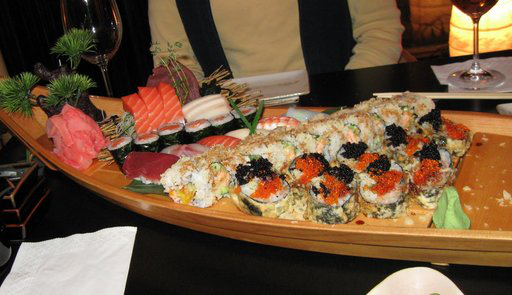

In [ ]:
import random

from PIL import Image

# random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print(f"Random Image Path : {random_image_path}")
print(f"Image class : {image_class}")
print(f"Image Height : {img.height}")
print(f"Image Width : {img.width}")
img

(-0.5, 511.5, 294.5, -0.5)

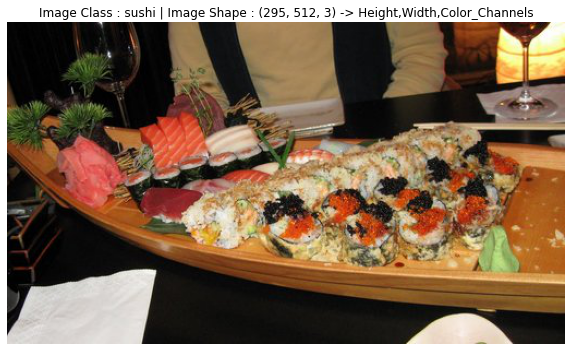

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10,7))
plt.imshow(img_as_array)
plt.title(f"Image Class : {image_class} | Image Shape : {img_as_array.shape} -> Height,Width,Color_Channels")
plt.axis(False)

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [ ]:
data_transform =  transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
]) 

In [ ]:
data_transform(img).dtype

torch.float32

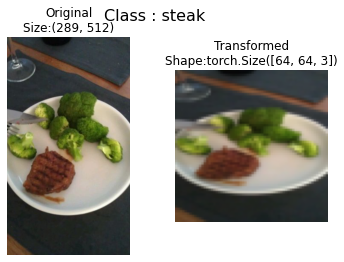

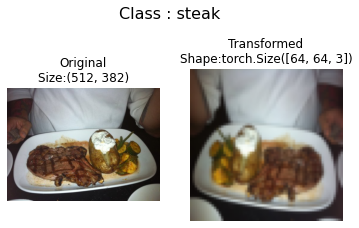

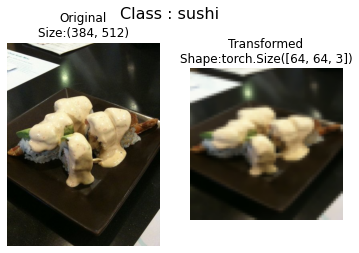

In [ ]:
def plot_transformed_images(image_paths:list,transform,n=3,seed=None):
  """
  Select random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths,k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig,ax = plt.subplots(nrows=1,ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize:{f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1,2,0)

      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape:{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class : {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
img,label = train_data[0][0],train_data[0][1]
print(f"Image tensor : {img}")
print(f"Image shape : {img.shape}")
print(f"Image datatype : {img.dtype}")
print(f"Image label : {label}")
print(f"Label datatype : {type(label)}")

Image tensor : tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0706, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0196, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.0

In [ ]:
class_names[label]

'pizza'

Original shape : torch.Size([3, 64, 64])  --> [color_channels,height,width]
Image permuted : torch.Size([64, 64, 3])  --> [height,width,color_channels]


Text(0.5, 1.0, 'pizza')

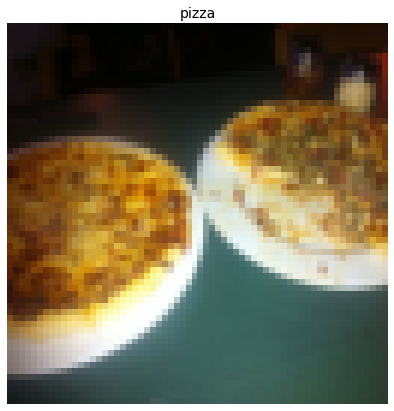

In [ ]:
img_permute = img.permute(1,2,0)

print(f"Original shape : {img.shape}  --> [color_channels,height,width]")
print(f"Image permuted : {img_permute.shape}  --> [height,width,color_channels]")

plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label],fontsize=14)

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=1, #os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False
                             )

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f39aa2ced30>,
 <torch.utils.data.dataloader.DataLoader at 0x7f39aa2cec40>)

In [ ]:
len(train_dataloader),len(test_dataloader)

(225, 75)

In [ ]:
img,label = next(iter(train_dataloader))

print(f"Image shape : {img.shape}  ->  [batch_size,color_channels,height,width")
print(f"Label shape : {label.shape}")

Image shape : torch.Size([1, 3, 64, 64])  ->  [batch_size,color_channels,height,width
Label shape : torch.Size([1])


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict,List

In [ ]:
train_data.classes,train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
target_directory = train_dir
print(f"Target dir : {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir : data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'steak'>, <DirEntry 'sushi'>, <DirEntry 'pizza'>]

In [ ]:
def find_classes(directory:str) -> Tuple[List[str],Dict[str,int]]:
  """Finds the class folder names in a target directory"""
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    return FileNotFoundError(f"Couldn't find any classes in {directory}...Please check file structure...")

  class_to_idx = {class_name:i for i,class_name in enumerate(classes)}

  return classes,class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self,
               targ_dir:str,
               transform:None) -> None:
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

    self.transform = transform

    self.classes,self.class_to_idx = find_classes(targ_dir)

  def load_image(self,index:int) -> Image.Image:
    " Opens an image via a path and returns it ."

    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    " Returns the total number of samples "
    return len(self.paths)

  def __getitem__(self,index:int) -> Tuple[torch.Tensor,int]:
    " Returns one sample of data,data and label (X,y) "
    img = self.load_image(index)

    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img),class_idx
    else:
      return img,class_idx

In [ ]:
from torchvision import transforms
train_transforms = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.ToTensor()
])


test_transforms = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()
])

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform=test_transforms)

train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7f39aa2d5400>,
 <__main__.ImageFolderCustom at 0x7f39aa2d5340>)

In [ ]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7f39aa2d5400>,
 <__main__.ImageFolderCustom at 0x7f39aa2d5340>)

In [ ]:
len(train_data),len(train_data_custom)

(225, 225)

In [ ]:
len(test_data),len(test_data_custom)

(75, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes == test_data.classes)

True
True


In [ ]:
test_data,train_data

(Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_data_custom

In [ ]:
def display_random_images(dataset:torch.utils.data.Dataset,
                          classes:List[str] = None,
                          n:int = 10,
                          display_shape:bool = True,
                          seed:int = None):
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes , n shouldn't be larger than 10 ,setting to ")

  if seed:
    random.seed(seed)
  
  random_samples_idx = random.sample(range(len(dataset)),k=n )

  plt.figure(figsize=(16,8))

  for i,targ_sample in enumerate(random_samples_idx):
    targ_image,targ_label = dataset[targ_sample][0],dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1,2,0)

    plt.subplot(1,n,i+1)

    plt.imshow(targ_image_adjust)

    plt.axis("off")

    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f"\nshape: {targ_image_adjust.shape}"

    plt.title(title)


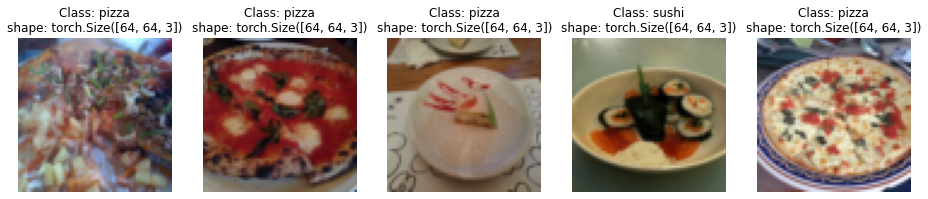

In [ ]:
display_random_images(train_data,
                      n=5,
                      classes=class_names,
                      seed=None)

For display purposes , n shouldn't be larger than 10 ,setting to 


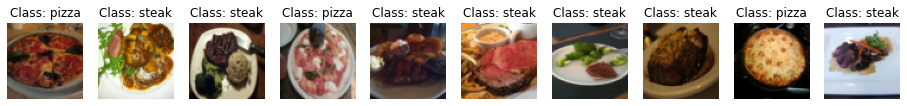

In [ ]:
display_random_images(train_data_custom,
                      n=20,
                      classes=class_names,
                      seed=42)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = 0
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=False)

train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f39a96ca940>,
 <torch.utils.data.dataloader.DataLoader at 0x7f39a96c2cd0>)

In [ ]:
img_custom,label_custom = next(iter(train_dataloader_custom))

img_custom.shape,label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
                                      transforms.Resize(size=(224,224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
])

test_transform = transforms.Compose([
                                      transforms.Resize(size=(224,224)),
                                      transforms.ToTensor()
])

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/2628106.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2979061.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/176508.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1787505.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3727036.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2878151.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1264154.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1961025.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2648423.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3518960.jpg')]

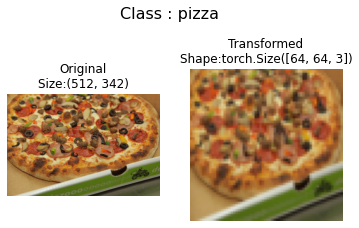

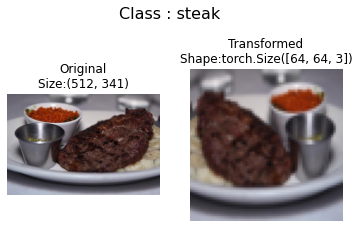

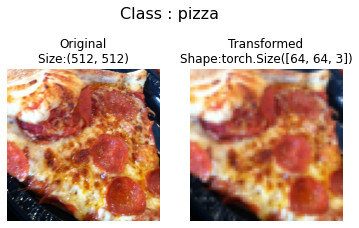

In [ ]:
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transforms,
    n=3,
    seed=None
)

In [ ]:
simple_transform = transforms.Compose([
                                      transforms.Resize(size=(64,64)),
                                      transforms.ToTensor()
])

In [ ]:
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True,
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [ ]:
class TinyVGG(nn.Module):
  """
  Model architecture copying TinyVGG from CNN Explainer 
  """

  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 13 * 13,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    # return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)

model_0 = TinyVGG(input_shape = 3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
image_batch,label_batch = next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_0(image_batch.to(device))

tensor([[ 2.0789e-02, -1.9351e-03,  9.5317e-03],
        [ 1.8427e-02,  2.4670e-03,  6.6757e-03],
        [ 1.7699e-02,  1.0262e-03,  9.4657e-03],
        [ 2.4441e-02, -3.3526e-03,  9.6011e-03],
        [ 1.9930e-02,  6.6316e-04,  1.0779e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0999e-02,  1.2870e-04,  1.2473e-02],
        [ 2.1577e-02, -1.9507e-03,  9.6941e-03],
        [ 2.4504e-02, -4.7745e-03,  8.5280e-03],
        [ 2.0252e-02, -4.7294e-04,  1.0908e-02],
        [ 2.2215e-02, -4.1838e-04,  9.8123e-03],
        [ 2.2313e-02, -2.1622e-03,  9.4456e-03],
        [ 2.1841e-02, -3.7132e-03,  8.3783e-03],
        [ 2.2863e-02, -1.7724e-03,  1.0287e-02],
        [ 2.1647e-02, -4.4139e-03,  9.5022e-03],
        [ 2.2096e-02, -4.1426e-03,  9.3853e-03],
        [ 2.1209e-02, -4.4219e-03,  1.1475e-02],
        [ 2.1711e-02, -2.7656e-03,  8.5006e-03],
        [ 1.9951e-02,  2.8249e-05,  8.4380e-03],
        [ 1.8298e-02,  1.6306e-03,  8.5499e-03],
        [ 2.0768e-02

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

In [ ]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  model.train()

  train_loss,train_acc = 0,0

  for batch,(X,y) in enumerate(dataloader):

    X,y = X.to(device),y.to(device)

    y_pred = model(X)

    loss = loss_fn(y_pred,y)

    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)

    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)

  return train_loss,train_acc

In [ ]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device=device):
  
  model.eval()

  test_loss,test_acc = 0,0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):

      X,y = X.to(device),y.to(device)

      test_pred_logits = model(X)

      loss = loss_fn(test_pred_logits,y)

      test_loss += loss.item()

      test_pred_labels = test_pred_logits.argmax(dim=1)

      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  test_loss = test_loss/len(dataloader)
  test_acc = test_acc/len(dataloader)

  return test_loss,test_acc

In [ ]:
from tqdm.auto import tqdm

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module = nn.CrossEntropyLoss(),
          epochs:int=5,
          device=device):
  results = {
      "train_loss":[],
      "train_acc":[],
      "test_loss":[],
      "test_acc":[]
  }

  for epoch in tqdm(range(epochs)):
    train_loss,train_acc = train_step(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      device=device)
    
    test_loss,test_acc = test_step(model=model,
                                   dataloader=test_dataloader,
                                   loss_fn=loss_fn,
                                   device=device)
    
    print(f"Epoch : {epoch} | Train loss : {train_loss:.4f}  |  Train acc : {train_acc:.4f}  |  Test loss : {test_loss:.4f}  |  Test acc : {test_acc:.4f}")


    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

end_time = timer()


print(f"Total training time : {end_time-start_time:.4f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0 | Train loss : 1.1063  |  Train acc : 0.3047  |  Test loss : 1.0983  |  Test acc : 0.2907
Epoch : 1 | Train loss : 1.0995  |  Train acc : 0.3320  |  Test loss : 1.0698  |  Test acc : 0.5417
Epoch : 2 | Train loss : 1.0863  |  Train acc : 0.4922  |  Test loss : 1.0800  |  Test acc : 0.5227
Epoch : 3 | Train loss : 1.0825  |  Train acc : 0.4102  |  Test loss : 1.0599  |  Test acc : 0.5729
Epoch : 4 | Train loss : 1.0630  |  Train acc : 0.4141  |  Test loss : 1.0612  |  Test acc : 0.5540
Total training time : 11.1543 seconds


In [ ]:
model_0_results

{'train_loss': [1.106342926621437,
  1.099508598446846,
  1.0862515717744827,
  1.0824583917856216,
  1.063005343079567],
 'train_acc': [0.3046875, 0.33203125, 0.4921875, 0.41015625, 0.4140625],
 'test_loss': [1.09831698735555,
  1.0698397159576416,
  1.0799938837687175,
  1.0598973433176677,
  1.0611675182978313],
 'test_acc': [0.29071969696969696,
  0.5416666666666666,
  0.5227272727272728,
  0.5729166666666666,
  0.5539772727272728]}

In [ ]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results:Dict[str,List[float]]):
  """ Plots training curves of a results dictionary """

  loss = results["train_loss"]
  test_loss = results["test_loss"]

  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))
  
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label="train_loss")
  plt.plot(epochs,test_loss,label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label="train_accuracy")
  plt.plot(epochs,test_accuracy,label="test_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

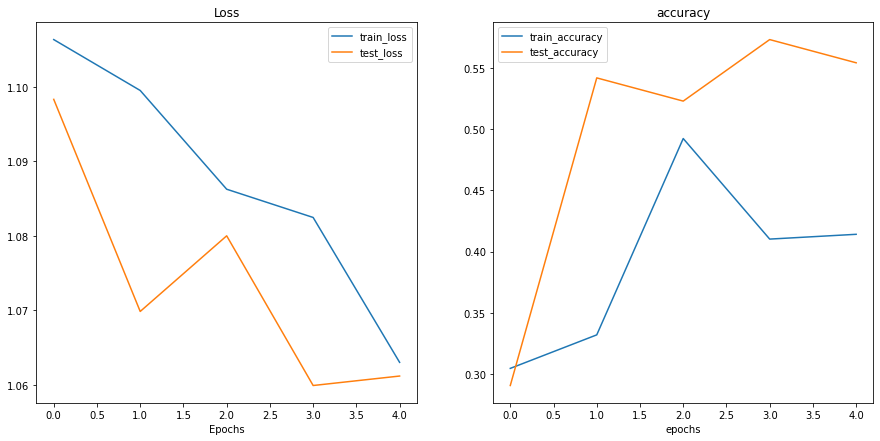

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
from torchvision import transforms
train_transform_trivial = transforms.Compose([
                                              transforms.Resize(size=(64,64)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
                                            transforms.Resize(size=(64,64)),
                                            transforms.ToTensor()
])

In [ ]:
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [ ]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


torch.manual_seed(42)
train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False,
                                    num_workers=NUM_WORKERS)

In [ ]:
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as timer

start_time = timer()

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

end_time = timer()

print(f"Total training time for model_1 : {end_time - start_time:.4f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 0 | Train loss : 1.1049  |  Train acc : 0.2500  |  Test loss : 1.1019  |  Test acc : 0.2604
Epoch : 1 | Train loss : 1.0807  |  Train acc : 0.4258  |  Test loss : 1.1260  |  Test acc : 0.2604
Epoch : 2 | Train loss : 1.0714  |  Train acc : 0.4258  |  Test loss : 1.1585  |  Test acc : 0.2604
Epoch : 3 | Train loss : 1.1251  |  Train acc : 0.3047  |  Test loss : 1.1586  |  Test acc : 0.2604
Epoch : 4 | Train loss : 1.0846  |  Train acc : 0.4219  |  Test loss : 1.1552  |  Test acc : 0.3229
Total training time for model_1 : 14.1324 seconds


In [ ]:
model_1_results

{'train_loss': [1.1049089580774307,
  1.0806987434625626,
  1.0714075788855553,
  1.1251050978899002,
  1.0846119821071625],
 'train_acc': [0.25, 0.42578125, 0.42578125, 0.3046875, 0.421875],
 'test_loss': [1.101934512456258,
  1.1260122458140056,
  1.1584730943044026,
  1.158629596233368,
  1.1551798184712727],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.3229166666666667]}

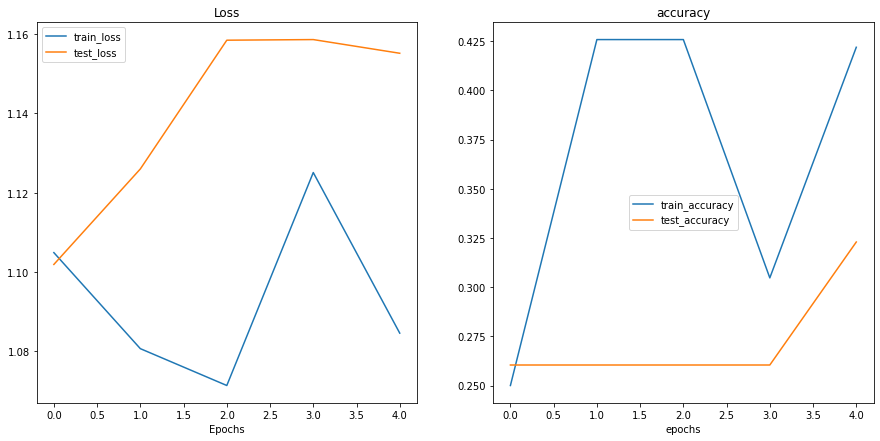

In [ ]:
plot_loss_curves(model_1_results)

In [ ]:
import pandas as pd

model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

,train_loss,train_acc,test_loss,test_acc
0,1.106343,0.304688,1.098317,0.290720
1,1.099509,0.332031,1.069840,0.541667
2,1.086252,0.492188,1.079994,0.522727
3,1.082458,0.410156,1.059897,0.572917
4,1.063005,0.414062,1.061168,0.553977


In [ ]:

model_0_df["train_loss"].shape

(5,)

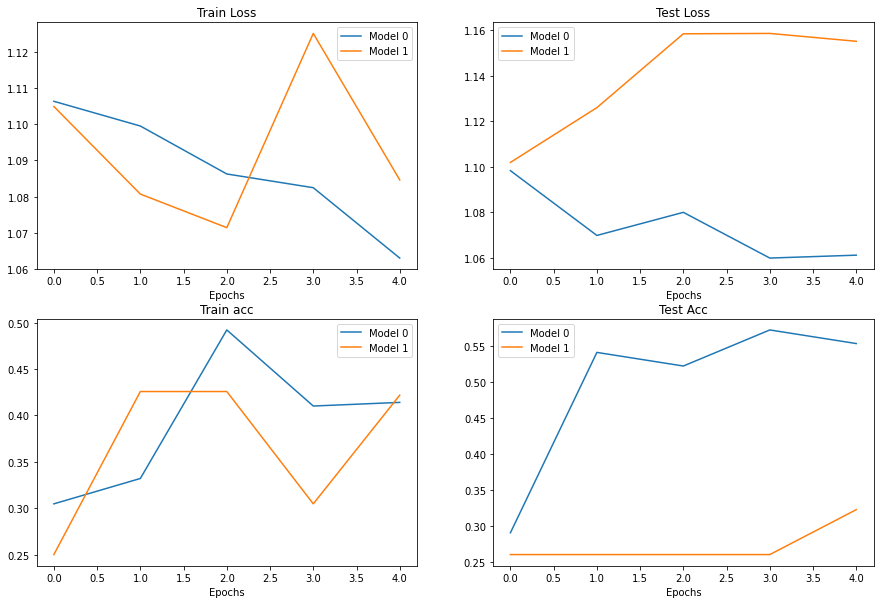

In [ ]:
plt.figure(figsize=(15,10))

epochs = range(len(model_0_df))

plt.subplot(2,2,1)
plt.plot(epochs,model_0_df["train_loss"],label="Model 0")
plt.plot(epochs,model_1_df["train_loss"],label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,2)
plt.plot(epochs,model_0_df["test_loss"],label="Model 0")
plt.plot(epochs,model_1_df["test_loss"],label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,3)
plt.plot(epochs,model_0_df["train_acc"],label="Model 0")
plt.plot(epochs,model_1_df["train_acc"],label="Model 1")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2,2,4)
plt.plot(epochs,model_0_df["test_acc"],label="Model 0")
plt.plot(epochs,model_1_df["test_acc"],label="Model 1")
plt.title("Test Acc")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists..skipping download...")

In [ ]:
str(custom_image_path)

'data/04-pizza-dad.jpeg'

In [ ]:
import torchvision 

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Custom image tensor {custom_image_uint8}")
print(f"Custom image shape {custom_image_uint8.shape}")
print(f"Custom image datatype {custom_image_uint8.dtype}")

Custom image tensor tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)
Custom image shape torch.Size([3, 4032, 3024])
Custom image datatyp

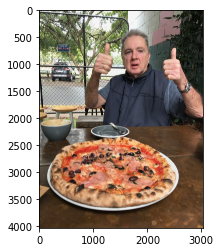

In [ ]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [ ]:
model_1.eval()

with torch.inference_mode():
  model_1(custom_image_uint8.to(device))

RuntimeError: ignored

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255.
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

In [ ]:
model_1.eval()

with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: ignored

In [ ]:
custom_image.shape

torch.Size([3, 4032, 3024])

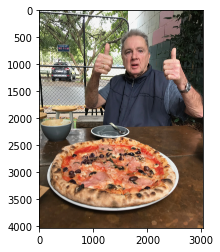

In [ ]:
plt.imshow(custom_image.permute(1,2,0))

In [ ]:
from torchvision import transforms

custom_image_transform = transforms.Compose([
                                              transforms.Resize(size=(64,64))
])


custom_image_transformed = custom_image_transform(custom_image)

print(f"Original image shape : {custom_image.shape}")
print(f"Transformed image shape : {custom_image_transformed.shape}")

Original image shape : torch.Size([3, 4032, 3024])
Transformed image shape : torch.Size([3, 64, 64])


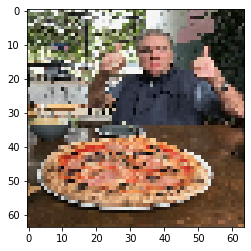

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

In [ ]:
model_1.eval()

with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: ignored

In [ ]:
custom_image_transformed.shape,custom_image_transformed.unsqueeze(0).shape

(torch.Size([3, 64, 64]), torch.Size([1, 3, 64, 64]))

In [ ]:
model_1.eval()

with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))

custom_image_pred

tensor([[ 0.0719,  0.0478, -0.2082]])

In [ ]:
custom_image_pred_probs = torch.softmax(custom_image_pred,dim=1)
custom_image_pred_probs

tensor([[0.3660, 0.3573, 0.2766]])

In [ ]:
custom_image_pred_label = torch.argmax(custom_image_pred_probs,dim=1).cpu()
custom_image_pred_label

tensor([0])

In [ ]:
class_names[custom_image_pred_label]

'pizza'

In [ ]:
def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str] = None,
                        transform=None,
                        device=device
                        ):
  """ Make a prediction on a target image with a trained model and plots the image and prediction. """

  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)


  target_image = target_image/255.

  if transform:
    target_image = transform(target_image)

  model.to(device)

  model.eval()

  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)

    target_image_pred = model(target_image.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred,dim=1)

  target_image_pred_label = torch.argmax(target_image_pred_probs,dim=1)

  plt.imshow(target_image.squeeze(0).permute(1,2,0))

  if class_names:
    title = f"Pred : {class_names[target_image_pred_label.cpu()]}  |  Prod : {target_image_pred_probs.max().cpu():.3f}"
  else:
        title = f"Pred : {target_image_pred_label}  |  Prod : {target_image_pred_probs.max().cpu():.3f}"

  plt.title(title)
  plt.axis(False)

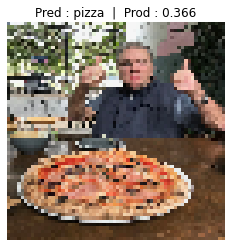

In [ ]:
pred_and_plot_image(model=model_1,
                    image_path = custom_image_path,
                    class_names = class_names,
                    transform = custom_image_transform,
                    device=device)